In [5]:
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
import pysal as ps

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import warnings
warnings.filterwarnings('ignore')

In [12]:
food = gpd.read_file("../../data/geojson/food_consumption_msoa.geojson").to_crs('EPSG:27700')
food.head(2)

,id,age_0_17,age_18_64,age_65+,alcohol,alcohol_ci95,alcohol_perc2.5,alcohol_perc25,alcohol_perc50,alcohol_perc75,...,volume_std,weight,weight_ci95,weight_perc2.5,weight_perc25,weight_perc50,weight_perc75,weight_perc97.5,weight_std,geometry
0,E02000001,1018.0,4349.0,1320.0,0.340733,0.004482,0.0,0.0,0.0,0.0,...,78.221175,323.180804,1.001360,35.0,150.0,250.0,400.0,1000.0,323.685705,"MULTIPOLYGON (((532135.146 182198.119, 532158...."
1,E02000002,2150.0,4151.0,1078.0,0.180770,0.013925,0.0,0.0,0.0,0.0,...,116.201057,397.651232,6.030232,32.5,150.0,300.0,500.0,1020.0,550.434424,"POLYGON ((548881.564 190845.265, 548881.126 19..."


In [13]:
food.crs

<Projected CRS: EPSG:27700>
Name: OSGB 1936 / British National Grid
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: UK - Britain and UKCS 49°46'N to 61°01'N, 7°33'W to 3°33'E
- bounds: (-9.2, 49.75, 2.88, 61.14)
Coordinate Operation:
- name: British National Grid
- method: Transverse Mercator
Datum: OSGB 1936
- Ellipsoid: Airy 1830
- Prime Meridian: Greenwich

In [14]:
food.columns.values

array(['id', 'age_0_17', 'age_18_64', 'age_65+', 'alcohol',
       'alcohol_ci95', 'alcohol_perc2.5', 'alcohol_perc25',
       'alcohol_perc50', 'alcohol_perc75', 'alcohol_perc97.5',
       'alcohol_std', 'apprenticeship', 'apprenticeship_p', 'area_sq_km',
       'avg_age', 'avg_age_norm', 'carb', 'carb_ci95', 'carb_perc2.5',
       'carb_perc25', 'carb_perc50', 'carb_perc75', 'carb_perc97.5',
       'carb_std', 'energy_alcohol', 'energy_alcohol_ci95',
       'energy_alcohol_perc2.5', 'energy_alcohol_perc25',
       'energy_alcohol_perc50', 'energy_alcohol_perc75',
       'energy_alcohol_perc97.5', 'energy_alcohol_std', 'energy_carb',
       'energy_carb_ci95', 'energy_carb_perc2.5', 'energy_carb_perc25',
       'energy_carb_perc50', 'energy_carb_perc75', 'energy_carb_perc97.5',
       'energy_carb_std', 'energy_density', 'energy_fat',
       'energy_fat_ci95', 'energy_fat_perc2.5', 'energy_fat_perc25',
       'energy_fat_perc50', 'energy_fat_perc75', 'energy_fat_perc97.5',
       'ene

In [15]:
W_q = ps.lib.weights.Queen.from_dataframe(food)
W_q

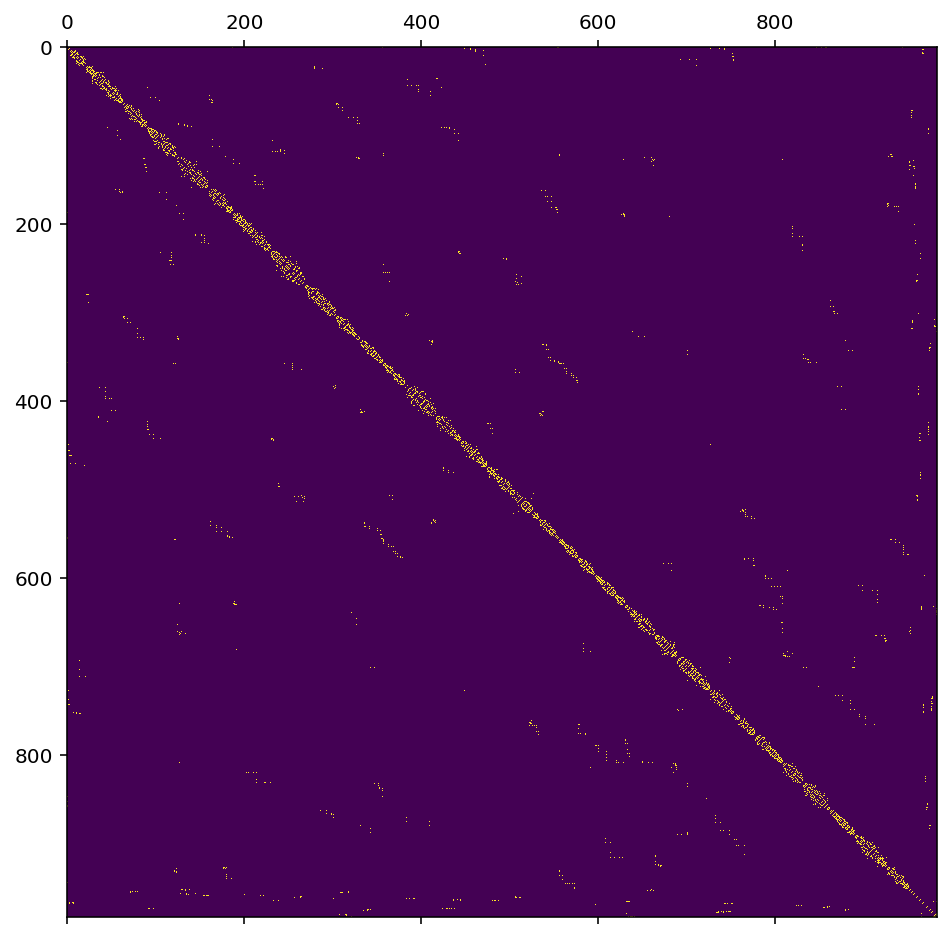

In [16]:
f, ax = plt.subplots(figsize=(8,8))
ax.matshow(W_q.sparse.todense())

In [29]:
def plot_weights(W, df):
    
    f, ax = plt.subplots(figsize=(8,8))
    ax.axis('off')

    df.plot(ax = ax, facecolor = 'gray', alpha= 0.3)
    W.plot(
            df, 
            edge_kws=dict(linewidth=1, color='orangered'), 
            node_kws=dict(s=0), 
            ax = ax)
    return f

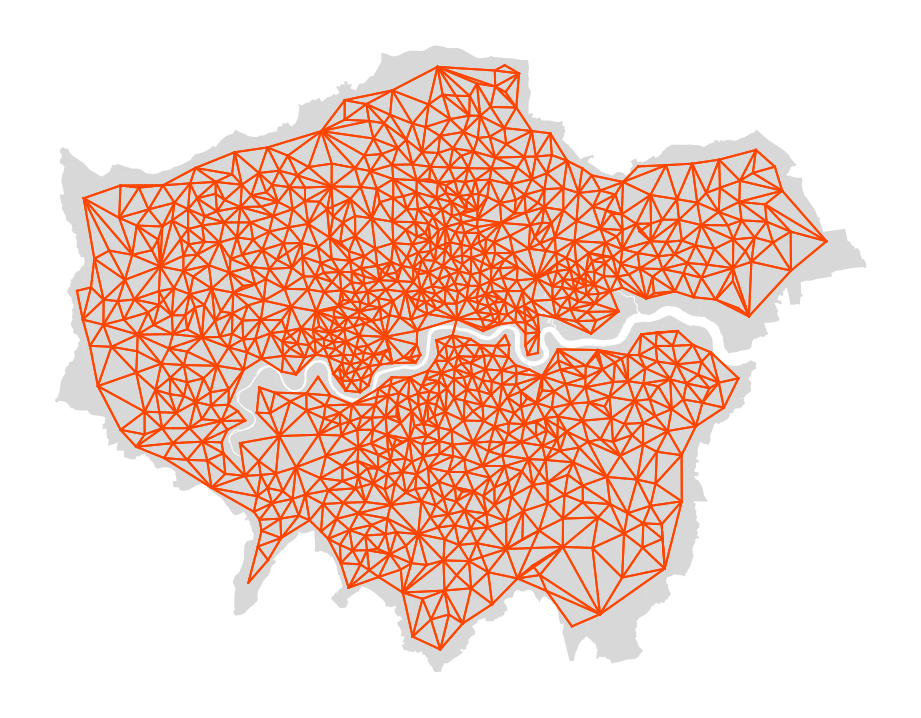

In [30]:
plot_weights(W_q, food)

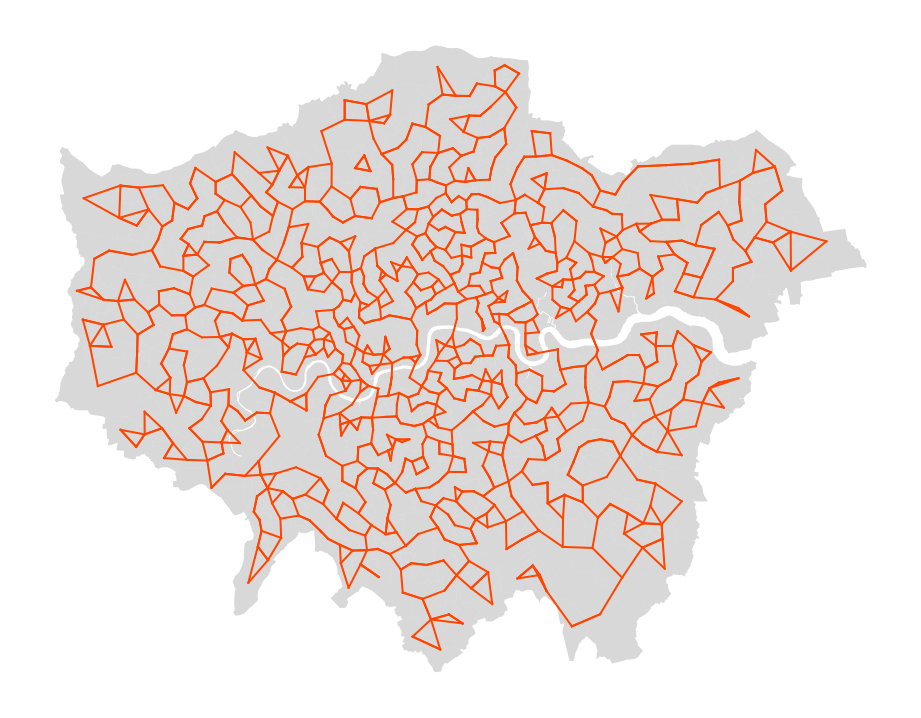

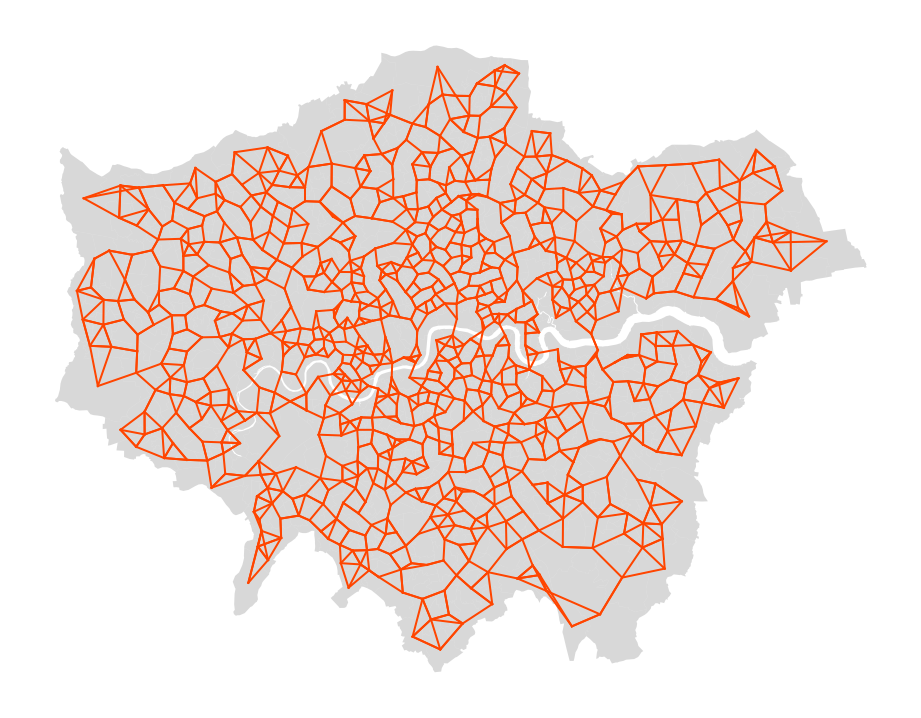

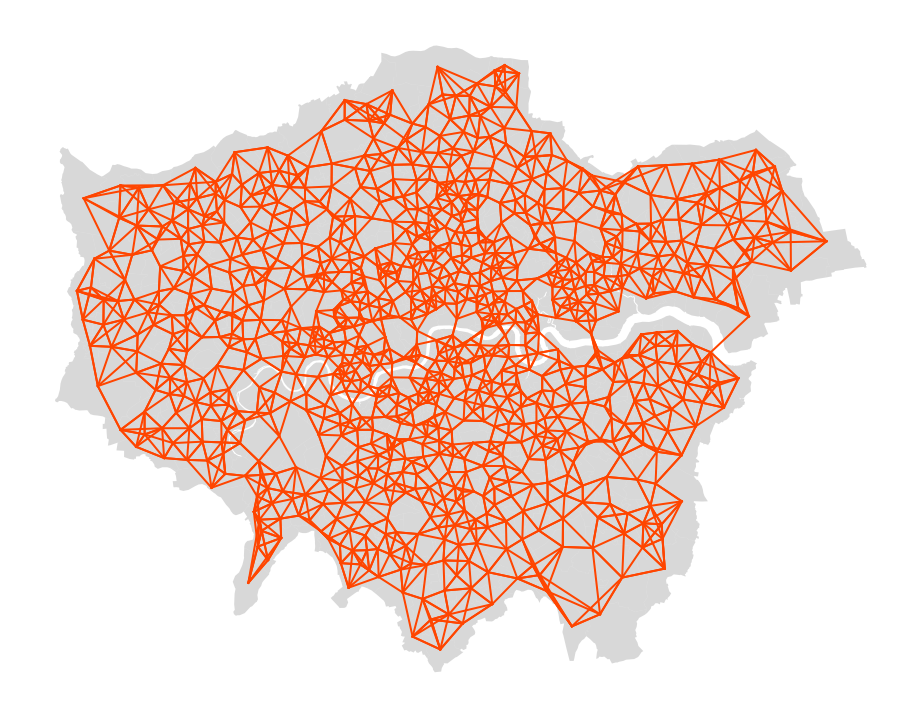

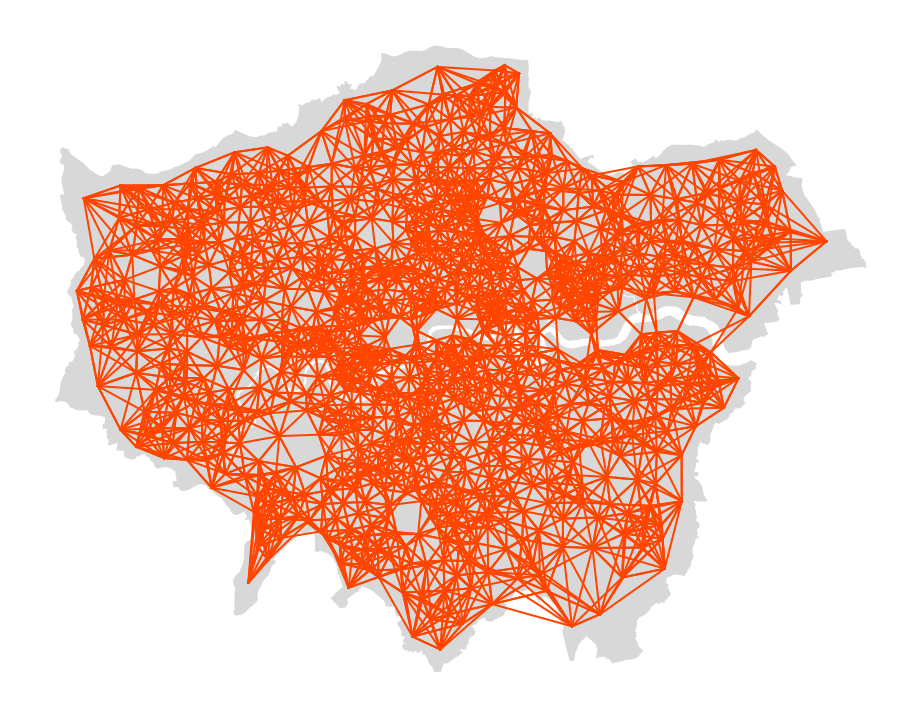

In [33]:
for k in [2,3,5,10]:
    W_knn = ps.lib.weights.KNN.from_dataframe(food, k=k)
    plot_weights(W_knn, food)